Import packages

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from lmfit import Model

Import all data (Holle cilinder)


In [303]:
# All datasets, angles and start/end-values
datasets = {
    '5.29': {
    'file': 'C:/Natuurkunde/NSP2/Data/Data_holle_cilinder/10cm_holle_cilinder_verbeterd.mqa',
    'start_index':226,
    'end_index':770},       
    '8.49': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_holle_cilinder/16cm_holle_cilinder.mqa',
    'start_index':216,
    'end_index':655},
    '11.71': {
    'file': 'C:/Natuurkunde/NSP2/Data/Data_holle_cilinder/22cm_holle_cilinder.mqa',
    'start_index':194,
    'end_index':572},       
    '14.97': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_holle_cilinder/28cm_holle_cilinder.mqa',
    'start_index':169,
    'end_index':503},   
    '18.28': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_holle_cilinder/34cm_holle_cilinder.mqa',
    'start_index':164,
    'end_index':465},
    '21.65': {
    'file': 'C:/Natuurkunde/NSP2/Data/Data_holle_cilinder/40cm_holle_cilinder.mqa',
    'start_index':246,
    'end_index':523},       
    '25.11': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_holle_cilinder/46cm_holle_cilinder.mqa',
    'start_index':382,
    'end_index':630},
    '28.67': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_holle_cilinder/52cm_holle_cilinder.mqa',
    'start_index':214,
    'end_index':464},
}

All data (Volle cilinder)

In [304]:
# All datasets, angles and start/end-values
datasets = {
    '5.29': {
    'file': 'C:/Natuurkunde/NSP2/Data/Data_volle_cilinder/volle_cilinder_10cm.mqa',
    'start_index':228,
    'end_index':543},       
    '8.49': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_volle_cilinder/volle_cilinder_16cm_verbeterd.mqa',
    'start_index':234,
    'end_index':565},
    '11.71': {
    'file': 'C:/Natuurkunde/NSP2/Data/Data_volle_cilinder/volle_cilinder_22cm.mqa',
    'start_index':246,
    'end_index':530},       
    '14.97': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_volle_cilinder/volle_cilinder_28cm.mqa',
    'start_index':249,
    'end_index':570},   
    '18.28': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_volle_cilinder/volle_cilinder_34_cm.mqa',
    'start_index':16,
    'end_index':175},
    '21.65': {
    'file': 'C:/Natuurkunde/NSP2/Data/Data_volle_cilinder/volle_cilinder_40_cm.mqa',
    'start_index':0,
    'end_index':150},       
    '25.11': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_volle_cilinder/volle_cilinder_46cm.mqa',
    'start_index':3,
    'end_index':145},
    '28.67': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_volle_cilinder/volle_cilinder_52cm.mqa',
    'start_index':0,
    'end_index':141},
}

All data (Water)

In [305]:
# All datasets, angles and start/end-values
datasets = {
    '5.29': {
    'file': 'C:/Natuurkunde/NSP2/Data/Data_cilinder_met_water/cilinder_met_water_10cm.mqa',
    'start_index':0,
    'end_index':318},       
    '8.49': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_cilinder_met_water/cilinder_met_water_16cm.mqa',
    'start_index':0,
    'end_index':231},
    '11.71': {
    'file': 'C:/Natuurkunde/NSP2/Data/Data_cilinder_met_water/cilinder_met_water_22cm.mqa',
    'start_index':0,
    'end_index':193},       
    '14.97': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_cilinder_met_water/cilinder_met_water_28cm.mqa',
    'start_index':154,
    'end_index':280},   
    '18.28': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_cilinder_met_water/cilinder_met_water_34cm.mqa',
    'start_index':15,
    'end_index':175},
    '21.65': {
    'file': 'C:/Natuurkunde/NSP2/Data/Data_cilinder_met_water/cilinder_met_water_40cm.mqa',
    'start_index':0,
    'end_index':125},       
    '25.11': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_cilinder_met_water/cilinder_met_water_46cm.mqa',
    'start_index':40,
    'end_index':155},
    '28.67': {
    'file':'C:/Natuurkunde/NSP2/Data/Data_cilinder_met_water/cilinder_met_water_52cm.mqa',
    'start_index': 40,
    'end_index':171},
}

Error calculation x,y

In [306]:
def xy_err():
    # Import calibration data
    path = 'C:/Natuurkunde/NSP2/Data/calibratie_err_s.mqa' 
    df = pd.read_csv(path, sep='\t', header=0)

    # Assign columns
    x_position_cal = df['Point #1.X']
    y_position_cal = df['Point #1.Y']
    
    # Manually specify the begin and end indices
    start_index = 1 
    end_index = 1528

    # Slice the data based on the manually specified range
    x_position_cal_selected = x_position_cal.iloc[start_index:end_index].reset_index(drop=True)
    y_position_cal_selected = y_position_cal.iloc[start_index:end_index].reset_index(drop=True)
    
    # Find maximal and minimal values in datasets
    x_max = np.max(x_position_cal_selected)
    x_min = np.min(x_position_cal_selected)
    y_max = np.max(y_position_cal_selected)
    y_min = np.min(y_position_cal_selected)
    
    # Find error on x and y in cm
    err_x = (x_max - x_min) / 2
    err_y = (y_max - y_min) / 2
    #print(err_x, err_y)
    return err_x, err_y

Fit $a$, error calculation in loop

In [307]:
# Initialize storage for results
results = []
list_alpha = []

# Loop over each dataset
for alpha_label, dataset_info in datasets.items():
    file_path = dataset_info['file']
    start_index = dataset_info['start_index']
    end_index = dataset_info['end_index']
    
    df = pd.read_csv(file_path, sep='\t', header=0)
    
    # Extract time, x-position, and y-position
    time = df['Time']
    x_position = df['Point #1.X']
    y_position = df['Point #1.Y']
    
    # Slice the data based on the manually specified range
    time_selected = time.iloc[start_index:end_index].reset_index(drop=True)
    x_position_selected = x_position.iloc[start_index:end_index].reset_index(drop=True)
    y_position_selected = y_position.iloc[start_index:end_index].reset_index(drop=True)

    # Adjust data to start at (0, 0)
    x_position_adjusted = x_position_selected - x_position_selected.iloc[0]
    y_position_adjusted = y_position_selected - y_position_selected.iloc[0]
    time_adjusted = time_selected - time_selected.iloc[0]
    
    # Calculate distance s
    s = np.sqrt(x_position_adjusted**2 + y_position_adjusted**2)
    
    # Calculate error on s in cm
    err_s = []
    err_x, err_y = xy_err()
    for x, y in zip(x_position_adjusted, y_position_adjusted):
        if x > 0 and y < 0:
            err_s.append(np.sqrt(((x**2)/(x**2 + y**2)) * err_x + ((y**2)/(x**2 + y**2)) * err_y))
            
     # Add weights
    weights = 1 / np.array(err_s)
    
    # Ensure lengths match
    min_length = min(len(time_adjusted), len(s), len(weights))
    time_adjusted = time_adjusted[:min_length]
    s = s[:min_length]
    weights = weights[:min_length]
    
    # Define the theoretical model function for s
    def theoretical_s(t, a, t_0):
        return 0.5 * a * (t - t_0)**2
    
    # Use lmfit Model to define the model and fit the data
    model = Model(theoretical_s)
    params = model.make_params(a=1, t_0=0)  # Initial guess for parameters

    # Fit the model to the data
    try:
        result = model.fit(s, params, t=time_adjusted, weights = weights)
        fitted_a = result.params['a'].value
        a_std = result.params['a'].stderr
        reduced_chi_squared = result.redchi
    except Exception as e:
        print(f"Error fitting data for alpha {alpha_label}: {e}")
        continue
    
    alpha = float(alpha_label)
    
    list_alpha.append(float(alpha_label))
    
    # Store the result
    results.append({'alpha': alpha, 'acc': fitted_a, 'err_a':a_std, 'red. chi^2':reduced_chi_squared})

# Convert results to a DataFrame for further use
results_df = pd.DataFrame(results)

# Display the data ready for plotting
print(results_df)

   alpha         acc     err_a  red. chi^2
0   5.29   61.806279  0.140702    6.599588
1   8.49  103.067236  0.224478    5.031710
2  11.71  142.476778  0.343394    5.622954
3  14.97  191.808497  0.401109    1.262743
4  18.28  227.520007  0.582421    3.355465
5  21.65  269.632050  0.862825    4.803621
6  25.11  307.462867  1.063596    4.678657
7  28.67  354.167301  0.939577    2.217498


Plot $a$ and $\alpha$ without fit

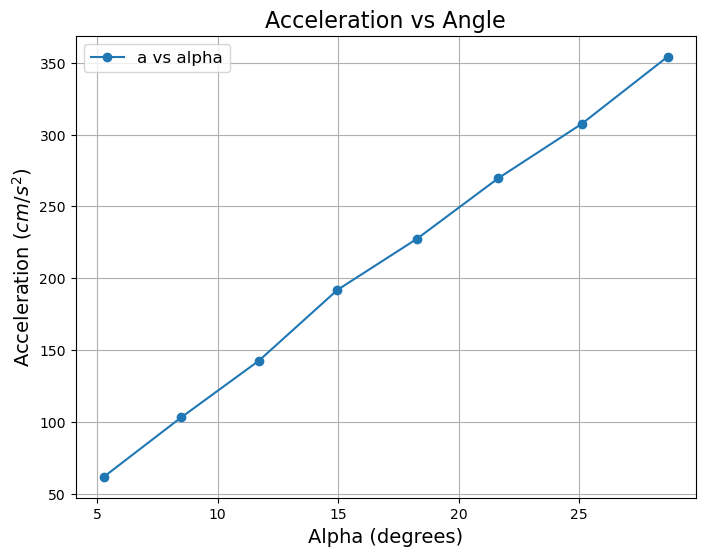

In [308]:
plt.figure(figsize=(8, 6))
plt.plot(results_df['alpha'], results_df['acc'], 'o-', label='a vs alpha')
plt.xlabel('Alpha (degrees)', fontsize=14)
plt.ylabel('Acceleration ($cm$/$s^2$)', fontsize=14)
plt.title('Acceleration vs Angle', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

Fit $B$

In [309]:
# Gravitational constant (cm/s^2)
g = 981

# Convert alpha to radians
results_df['alpha_radians'] = np.radians(results_df['alpha'])

# Define the fitting function
def acceleration_model(alpha, B):
    return g * np.sin(alpha) / B

# Create the model
model = Model(acceleration_model)

# Perform the fit
params = model.make_params(B=1)  # Initial guess for B
result = model.fit(results_df['acc'], params, alpha=results_df['alpha_radians'], weights=1/results_df['err_a'])

# Display the fit report
print(result.fit_report())

# Extract the fitted parameter and its uncertainty
fitted_B = result.params['B'].value
fitted_B_error = result.params['B'].stderr

print(f"Fitted B: {fitted_B} ± {fitted_B_error}")

[[Model]]
    Model(acceleration_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 11
    # data points      = 8
    # variables        = 1
    chi-square         = 1569.25101
    reduced chi-square = 224.178715
    Akaike info crit   = 44.2312974
    Bayesian info crit = 44.3107390
    R-squared          = 0.97831677
[[Variables]]
    B:  1.37669942 +/- 0.01822708 (1.32%) (init = 1)
Fitted B: 1.3766994192755708 ± 0.01822708262018404


Plot $a$ and $\alpha$ with fit

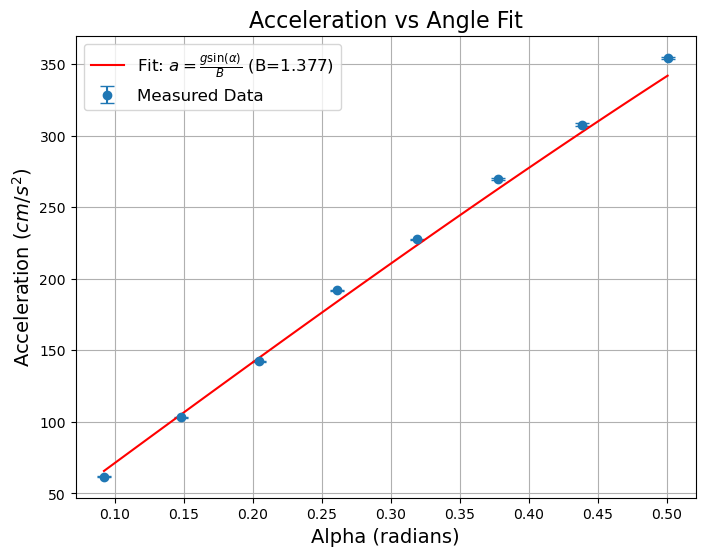

In [310]:
# Generate data for plotting the fit
alpha_fine = np.linspace(results_df['alpha_radians'].min(), results_df['alpha_radians'].max(), 100)
fitted_a = acceleration_model(alpha_fine, fitted_B)

# Plot data and the fit
plt.figure(figsize=(8, 6))
plt.errorbar(
    results_df['alpha_radians'],
    results_df['acc'],
    yerr=results_df['err_a'],
    fmt='o',
    label='Measured Data',
    capsize=5
)
plt.plot(alpha_fine, fitted_a, 'r-', label=f'Fit: $a = \\frac{{g \\sin(\\alpha)}}{{B}}$ (B={fitted_B:.3f})')
plt.xlabel('Alpha (radians)', fontsize=14)
plt.ylabel('Acceleration ($cm$/$s^2$)', fontsize=14)
plt.title('Acceleration vs Angle Fit', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('fit_normaal.png')
plt.show()

Plot $\alpha$, a without fit (axes flipped)

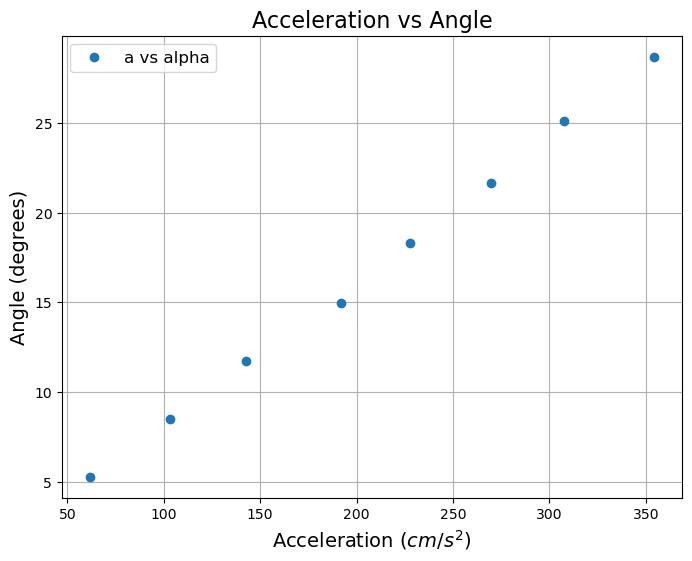

61.806278938798755
103.06723590966513
142.47677774574777
191.80849653490648
227.52000728585642
269.63205008944703
307.462866640808
354.1673008083745
   alpha         acc     err_a  red. chi^2  alpha_radians
0   5.29   61.806279  0.140702    6.599588       0.092328
1   8.49  103.067236  0.224478    5.031710       0.148178
2  11.71  142.476778  0.343394    5.622954       0.204378
3  14.97  191.808497  0.401109    1.262743       0.261276
4  18.28  227.520007  0.582421    3.355465       0.319046
5  21.65  269.632050  0.862825    4.803621       0.377864
6  25.11  307.462867  1.063596    4.678657       0.438252
7  28.67  354.167301  0.939577    2.217498       0.500386


In [311]:
plt.figure(figsize=(8, 6))
plt.plot(results_df['acc'], results_df['alpha'], 'o', label='a vs alpha')
plt.xlabel('Acceleration ($cm$/$s^2$)', fontsize=14)
plt.ylabel('Angle (degrees)', fontsize=14)
plt.title('Acceleration vs Angle', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('geenfit.png')
plt.show()
for i in np.array(results_df['acc']):
    print(i)
print(results_df)

Fit $B$ (angle_model)

In [312]:
delta_alpha = [0.00926, 0.00932, 0.00941, 0.00953, 0.00967, 0.00983, 0.01, 0.01]

def angle_model(a, B):
    alpha = np.arcsin((a*B) / g)
    return alpha

model = Model(angle_model)    
params = model.make_params(B=1)
result = model.fit(np.radians(np.array(results_df['alpha'])), params , a = np.array(results_df['acc']), weights = 1 / np.array(delta_alpha))

fitted_B = result.params['B'].value
fitted_B_error = result.params['B'].stderr
print(result.fit_report())

[[Model]]
    Model(angle_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 8
    # variables        = 1
    chi-square         = 2.64222144
    reduced chi-square = 0.37746021
    Akaike info crit   = -6.86257220
    Bayesian info crit = -6.78313066
    R-squared          = -17.5954659
[[Variables]]
    B:  1.34520917 +/- 0.00842369 (0.63%) (init = 1)


Plot $\alpha$ and $a$ with fit (axes flipped)

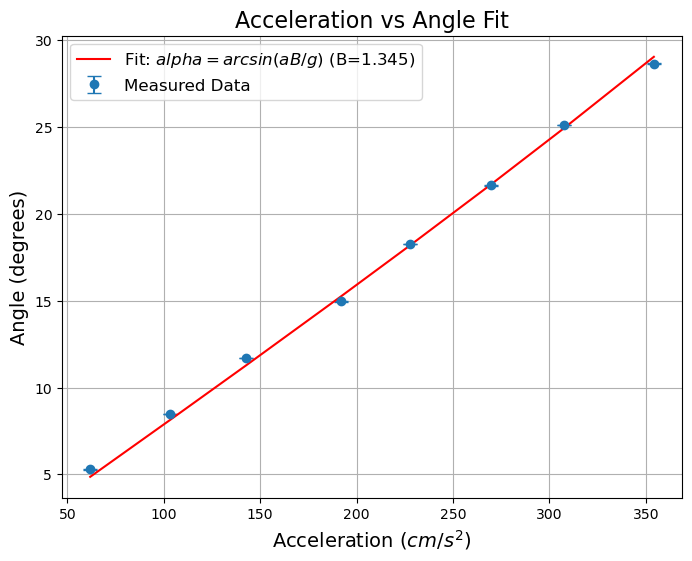

In [ ]:
acc_fine = np.linspace(results_df['acc'].min(), results_df['acc'].max(), 100)
fitted_alpha = angle_model(results_df['acc'], fitted_B)

# Plot data and the fit
plt.figure(figsize=(8, 6))
plt.errorbar(
    results_df['acc'],
    results_df['alpha'],
    yerr=delta_alpha,
    fmt='o',
    label='Measured Data',
    capsize=5
)
plt.plot(results_df['acc'], np.degrees(fitted_alpha), 'r-', label=f'Fit: $alpha$ $ = arcsin(aB/g)$ (B={fitted_B:.3f})')
plt.xlabel('Acceleration ($cm$/$s^2$)', fontsize=14)
plt.ylabel('Angle (degrees)', fontsize=14)
plt.title('Acceleration vs Angle Fit', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('fit_as_gedraaid.png')
plt.show()